In [1]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    olefile-0.46               |             py_0          31 KB  conda-forge
    pillow-7.1.2               |   py36h8328e55_0         656 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  olefile            conda-forge/noarch::olefi

In [25]:
#importing from wordcloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from wordcloud import WordCloud, STOPWORDS
print("Wordcloud is imported successfully")

Wordcloud is imported successfully


In [4]:
# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

In [6]:
#open the text and read it
alice_novel = open('alice_novel.txt','r').read()
print("Novel has been read successfully")

Novel has been read successfully


In [10]:
#erase the redundant words
stopwords = set(STOPWORDS)

In [12]:
#initialize a word cloud object
alice_wc = WordCloud(background_color='white',
                     max_words=2000,
                     stopwords=stopwords
                    )

#generate the word cloud
alice_wc.generate(alice_novel)

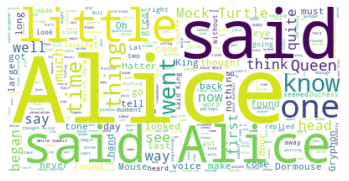

In [16]:
#display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

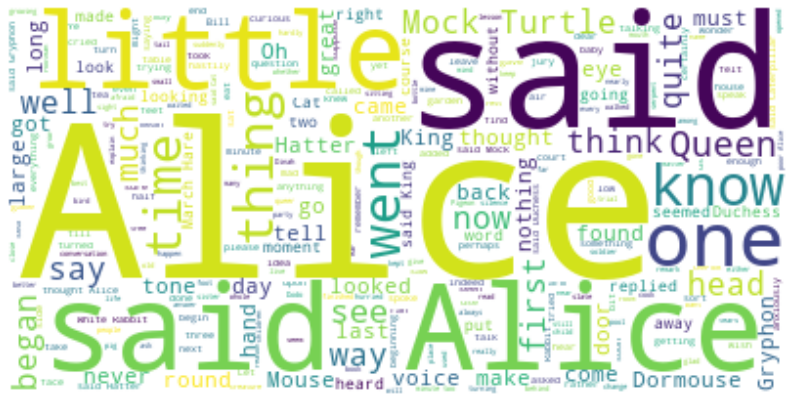

In [18]:
#setting the width and height of cloud so that other letters would be clear
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

#display the word cloud
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

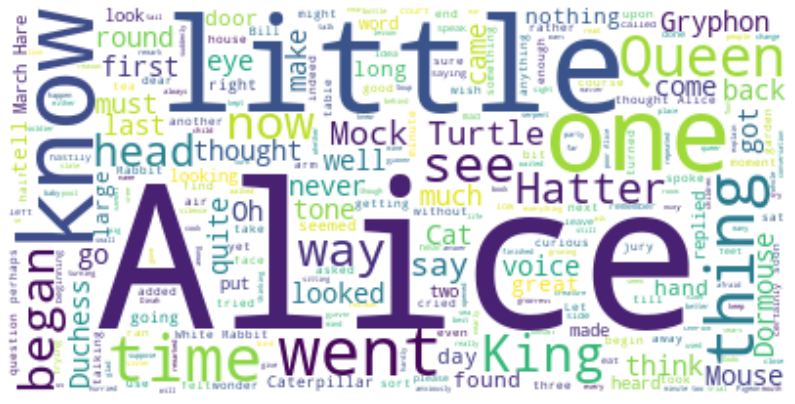

In [21]:
#removing the word said and regenerate the cloud
stopwords.add('said')

#generate the word cloud
alice_wc.generate(alice_novel)

#display the word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
#word cloud for our dataset now

In [38]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [39]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                   sheet_name='Canada by Citizenship',
                   skiprows = range(20), 
                   skipfooter = 2)
print("Data imported and succesfully framed.")

Data imported and succesfully framed.


In [40]:
#clean up the unnecessary data columns for consistency
df_can.drop(['AREA','Coverage','REG','DEV','Type'],axis=1, inplace =True)
#rename some of the columns for reliability
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
#set all the columns to string
df_can.columns = list(map(str,df_can.columns))
#indexing Country in the first so that it is easy to access
df_can.set_index('Country',inplace = True)
#creating the total columns
df_can['Total'] = df_can.sum(axis=1)

In [41]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [42]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [43]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [46]:
#generate the word cloud
word_cloud = WordCloud(background_color='white').generate(word_string)
print("Word cloud created.")

Word cloud created.


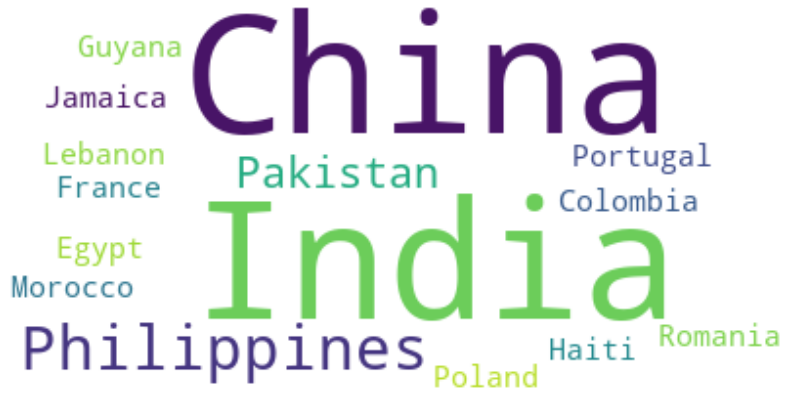

In [48]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()